# Using machine learning to predict loan default

### About the company: 
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[1](http://www.businessinsider.com/r-avantcredit-raises-225-million-from-tiger-global-peter-thiel-2014-12) It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.[2](https://www.economist.com/blogs/schumpeter/2013/01/lending-club) The company claims that $15.98 billion in loans had been originated through its platform up to December 31, 2015.[3](https://www.lendingclub.com/info/statistics.action)

LendingClub enables borrowers to create unsecured personal loans between $1,000 and $40,000. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.

LendingClub also makes traditional direct to consumer loans, including automobile refinance transactions, through WebBank, an FDIC-insured, state-chartered industrial bank that is headquartered in Salt Lake City Utah. The loans are not funded by investors but are assigned to other financial institutions.

The company raised $1 billion in what became the largest technology IPO of 2014 in the United States. Though viewed as a pioneer in the fintech industry and one of the largest such firms, LendingClub experienced problems in early 2016, with difficulties in attracting investors, a scandal over some of the firm's loans and concerns by the board over CEO Renaud Laplanche's disclosures leading to a large drop in its share price and Laplanche's resignation.

### Credit Risk 
When initially founded, LendingClub positioned itself as a social networking service and set up opportunities for members to identify group affinities, based on a theory that borrowers would be less likely to default to lenders with whom they had affinities and social relationships. **It developed an algorithm called LendingMatch for identifying common relationship factors such as geographic location, educational and professional background, and connectedness within a given social network.**[4](https://www.lendingclub.com/info/how-it-works.action),[5](https://web.archive.org/web/20110713200446/http://blog.lendingclub.com/images/7920.pdf),[6](https://www.usatoday.com/money/perfi/credit/2007-12-25-peerlending-pers_N.htm)

It offers the algorithm as a search tool for investors to find Notes they would like to purchase, using borrower and loan attributes such as the length of a loan term, target weighted average interest rate, borrower credit score, employment tenure, home ownership status, and others.[7](https://www.lendingclub.com/extdata/Clean_As_Filed_20101015.pdf) To reduce default risk, LendingClub focuses on high-credit-worthy borrowers, declining approximately 90% of the loan applications it received as of 2012[8](https://www.lendingclub.com/info/statistics.action) and assigning higher interest rates to riskier borrowers within its credit criteria.[9](https://www.sec.gov/Archives/edgar/data/1409970/000119312512151868/d306143ds1a.htm#rom306143_20) Only borrowers with FICO score of 660 or higher can be approved for loans.[10](https://www.lendingclub.com/public/how-we-set-interest-rates.action)

The statistics on LendingClub's website state that, as of December 31, 2016, 62.3 percent of borrowers report using their loans to refinance other loans or pay credit card debt.[11](https://www.lendingclub.com/info/statistics.action)


### Project goal:
Can we use Machine Learning to build a model that predicts whether a borrower will default on a loan, that matches or exceeds LendingClub's own algorithm?

### We can use two different approaches:
1. Predict loan defaults upon application submission - Using this approach, we would exclude features that would not be availble pre loan (e.g. loan_amount, funded_amount/funded_amount_inv, term, int_rate, installment, etc.)
2. Predict loan defaults after approval and disbursement - Using this approache, we have the full dataset accessible.

For our analysis, we will go with option 1.



*Note: We'll exculde LendingClub's own classification as that information is aleady generted by LC's own algorith.*



In [1]:
# Data wrangling libraries
import pandas as pd
import numpy as np
import pandas_profiling
pd.set_option('display.max_columns', None)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Setting up environment in comet.ml
from api_key import api_key
from comet_ml import Experiment
experiment = Experiment(api_key=api_key, project_name='loan_default_prediction')

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/tiroger/loan-default-prediction/484a9b56f93b425b9f22c17d2005ee4a



In [2]:
# Opening the raw dataset
raw_loan_data_df = pd.read_csv('lending-club/accepted_2007_to_2018Q4.csv', low_memory=False)
experiment.log_dataset_hash(raw_loan_data_df)

## Data Cleanup and Feature Selection

In [3]:
raw_loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
cols_rows = raw_loan_data_df.shape
print(f'Raw dataset contains {cols_rows[0]} rows and {cols_rows[1]} columns')

Raw dataset contains 2260701 rows and 151 columns


In [5]:
columns = raw_loan_data_df.columns
list(columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [6]:
raw_loan_data_df.describe(exclude=np.object)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

In [7]:
missing_values = raw_loan_data_df.isna().sum()/len(raw_loan_data_df) * 100

In [8]:
missing_values

id                         0.00000
member_id                100.00000
loan_amnt                  0.00146
funded_amnt                0.00146
funded_amnt_inv            0.00146
                           ...    
settlement_status         98.48516
settlement_date           98.48516
settlement_amount         98.48516
settlement_percentage     98.48516
settlement_term           98.48516
Length: 151, dtype: float64

In [9]:
missing_value_df = pd.DataFrame(missing_values.sort_values(ascending=False))
missing_value_df.head(50)

,0
member_id,100.000000
orig_projected_additional_accrued_interest,99.617331
hardship_loan_status,99.517097
hardship_dpd,99.517097
hardship_reason,99.517097
hardship_status,99.517097
deferral_term,99.517097
hardship_amount,99.517097
hardship_start_date,99.517097
hardship_end_date,99.517097


First, we remove all features that investors would not have access to prior to loan approval. Second, not all features are intuitively useful for our learning models, such as the loan ID and the month the last payment was received. Moreover, some features are duplicates (e.g. 'loan_amnt','funded_amnt' and 'funded_amnt_inv'). Thus we remove such fields. We also remove field swith greater than 10% of missing data. We also removed any loans that were missing more than 10% data for any field, unless we can fill-in the missing values. Finally we remove LendingClub's own credit "worthiness" score. 

In [10]:
keep_features = [
    #'id',
 #'member_id',
 'loan_amnt',
 #'funded_amnt',
 #'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 #'grade',
 #'sub_grade',
 #'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 #'issue_d',
 'loan_status',
 #'pymnt_plan',
 #'url',
 #'desc',
 'purpose',
 #'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 #'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 #'initial_list_status',
 #'out_prncp',
 #'out_prncp_inv',
 #'total_pymnt',
 #'total_pymnt_inv',
 #'total_rec_prncp',
 #'total_rec_int',
 #'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 #'last_pymnt_d',
 #'last_pymnt_amnt',
 #'next_pymnt_d',
 #'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 #'policy_code',
 'application_type',
 #'annual_inc_joint',
 #'dti_joint',
 #'verification_status_joint',
 #'acc_now_delinq',
 'tot_coll_amt',
 #'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 #'revol_bal_joint',
 #'sec_app_fico_range_low',
 #'sec_app_fico_range_high',
 #'sec_app_earliest_cr_line',
 #'sec_app_inq_last_6mths',
 #'sec_app_mort_acc',
 #'sec_app_open_acc',
 #'sec_app_revol_util',
 #'sec_app_open_act_il',
 #'sec_app_num_rev_accts',
 #'sec_app_chargeoff_within_12_mths',
 #'sec_app_collections_12_mths_ex_med',
 #'sec_app_mths_since_last_major_derog',
 #'hardship_flag',
 #'hardship_type',
 #'hardship_reason',
 #'hardship_status',
 #'deferral_term',
 #'hardship_amount',
 #'hardship_start_date',
 #'hardship_end_date',
 #'payment_plan_start_date',
 #'hardship_length',
 #'hardship_dpd',
 #'hardship_loan_status',
 #'orig_projected_additional_accrued_interest',
 #'hardship_payoff_balance_amount',
 #'hardship_last_payment_amount',
 #'disbursement_method',
 #'debt_settlement_flag',
 #'debt_settlement_flag_date',
 #'settlement_status',
 #'settlement_date',
 #'settlement_amount',
 #'settlement_percentage',
 #'settlement_term'
]


In [11]:
# Removing extraneous columns
pre_disbursement_df = raw_loan_data_df[keep_features]
pre_disbursement_df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,tot_coll_amt,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,190xx,PA,5.91,0.0,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,564.0,560.0,0.0,30.0,Individual,722.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,577xx,SD,16.06,1.0,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,699.0,695.0,0.0,NaN,Individual,0.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,60 months,10.78,432.66,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,605xx,IL,10.78,0.0,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,704.0,700.0,0.0,NaN,Joint App,0.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,35000.0,60 months,14.85,829.90,10+ years,MORTGAGE,110000.0,Source Verified,Current,debt_consolidation,076xx,NJ,17.06,0.0,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,0.0,0.0,679.0,675.0,0.0,NaN,Individual,0.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0
4,10400.0,60 months,22.45,289.91,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,174xx,PA,25.37,1.0,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,704.0,700.0,0.0,NaN,Individual,0.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0


In [12]:
# We're intested in the loan_status columns
pre_disbursement_df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)



For our analysis, we'll consider only 2 major categories outcomes, "Charged off"/Default and "Fully Paid". A few reasons to do this:

1. To convert it into a binary cassification problem, and to analyze in detail the effect of important variables on the loan status.
2. A lot of observations show status "Current", so we do not know whether it will be "Charged Off", "Fully Paid" or "Default".
3. The observations for "Default" alone are too less as compared to "Fully Paid" or "Charged Off", to thoughroly investigate those observations with loan status as "Default".
4. The remaining categories of "loan status" are not of prime importance for this analysis.



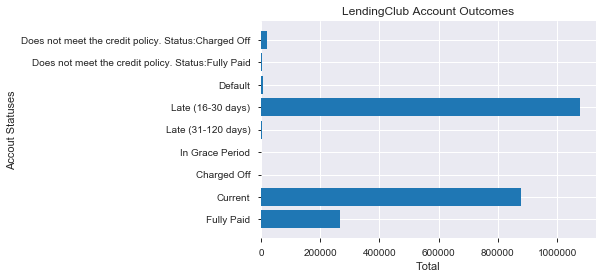

In [15]:
y_pos = list(pre_disbursement_df.groupby('loan_status')['loan_status'].count())
x = pre_disbursement_df.loan_status.dropna().unique()

plt.barh(x, y_pos)
# plt.xticks(x, rotation='vertical')
plt.xlabel('Total')
plt.ylabel('Accout Statuses')
plt.title('LendingClub Account Outcomes')

plt.show()

In [16]:
model_accounts = pre_disbursement_df[(pre_disbursement_df.loan_status == 'Fully Paid') | 
                                     (pre_disbursement_df.loan_status == 'Does not meet the credit policy. Status:Fully Paid') | 
                                     (pre_disbursement_df.loan_status == 'Default') |  
                                     (pre_disbursement_df.loan_status == 'Charged Off') | 
                                     (pre_disbursement_df.loan_status == 'Does not meet the credit policy. Status:Charged Off')
                                    ].copy()

In [17]:
model_accounts.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,tot_coll_amt,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,190xx,PA,5.91,0.0,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,564.0,560.0,0.0,30.0,Individual,722.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,577xx,SD,16.06,1.0,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,699.0,695.0,0.0,NaN,Individual,0.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,60 months,10.78,432.66,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,605xx,IL,10.78,0.0,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,704.0,700.0,0.0,NaN,Joint App,0.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
4,10400.0,60 months,22.45,289.91,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,174xx,PA,25.37,1.0,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,704.0,700.0,0.0,NaN,Individual,0.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
5,11950.0,36 months,13.44,405.18,4 years,RENT,34000.0,Source Verified,Fully Paid,debt_consolidation,300xx,GA,10.20,0.0,690.0,694.0,0.0,NaN,NaN,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,759.0,755.0,0.0,NaN,Individual,0.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,NaN,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0


In [18]:
model_accounts.groupby('loan_status')[['loan_status']].count()

,loan_status
loan_status,
Charged Off,268559
Default,40
Does not meet the credit policy. Status:Charged Off,761
Does not meet the credit policy. Status:Fully Paid,1988
Fully Paid,1076751


In [19]:
# Renaming loan_statuses: 
# Charged Off, Default and Does not meet the credit policy., Status:Charged Off renamed to default
# Does not meet the credit policy. Status:Fully Paid., and 'Fully Paid' renamed to paid

model_accounts.loan_status.replace({'Charged Off': 'default', 
                                    'Default': 'default', 
                                    'Does not meet the credit policy. Status:Charged Off': 
                                    'default', 'Fully Paid': 'paid', 
                                    'Does not meet the credit policy. Status:Fully Paid': 'paid'}, inplace=True)

In [20]:
model_accounts.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,tot_coll_amt,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,paid,debt_consolidation,190xx,PA,5.91,0.0,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,564.0,560.0,0.0,30.0,Individual,722.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,paid,small_business,577xx,SD,16.06,1.0,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,699.0,695.0,0.0,NaN,Individual,0.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,60 months,10.78,432.66,10+ years,MORTGAGE,63000.0,Not Verified,paid,home_improvement,605xx,IL,10.78,0.0,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,704.0,700.0,0.0,NaN,Joint App,0.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
4,10400.0,60 months,22.45,289.91,3 years,MORTGAGE,104433.0,Source Verified,paid,major_purchase,174xx,PA,25.37,1.0,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,704.0,700.0,0.0,NaN,Individual,0.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
5,11950.0,36 months,13.44,405.18,4 years,RENT,34000.0,Source Verified,paid,debt_consolidation,300xx,GA,10.20,0.0,690.0,694.0,0.0,NaN,NaN,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,759.0,755.0,0.0,NaN,Individual,0.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,NaN,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0


In [21]:
model_accounts_shape = model_accounts.shape
rows = model_accounts_shape[0]
cols = model_accounts_shape[1]
print(f'Dataset to build model contains {rows} rows and {cols} columns.')

Dataset to build model contains 1348099 rows and 84 columns.


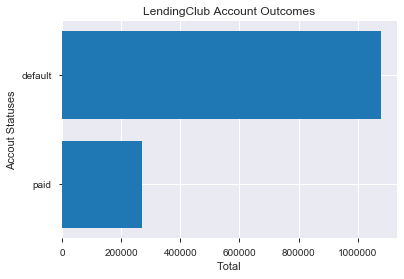

In [22]:
y_pos = list(model_accounts.groupby('loan_status')['loan_status'].count())
x = model_accounts.loan_status.dropna().unique()

plt.barh(x, y_pos)
# plt.xticks(x, rotation='vertical')
plt.xlabel('Total')
plt.ylabel('Accout Statuses')
plt.title('LendingClub Account Outcomes')

plt.show()

Note that dataset in extremely imbalanced.

In [23]:
model_accounts.isna().sum().sort_values(ascending=False)

mths_since_last_record            1118675
mths_since_recent_bc_dlq          1029070
mths_since_last_major_derog        994342
mths_since_recent_revol_delinq     898123
il_util                            883052
                                   ...   
recoveries                              0
collection_recovery_fee                 0
last_fico_range_low                     0
application_type                        0
loan_amnt                               0
Length: 84, dtype: int64

In [24]:
# Determining unique values in all columns
for column in model_accounts:
   unique_values = model_accounts[column].unique()
   unique_values_count = model_accounts[column].nunique()
   print(f'{column}: {unique_values}')
   print(f'{column}: {unique_values_count}')

loan_amnt: [ 3600. 24700. 20000. ... 38125. 37450. 36725.]
loan_amnt: 1560
term: [' 36 months' ' 60 months']
term: 2
int_rate: [13.99 11.99 10.78 22.45 13.44  9.17  8.49  6.49 11.48 12.88 19.48  7.49
 19.89 14.85  5.32 17.97 24.24 15.77  9.8  17.27 18.49  7.91 23.13 20.5
 16.59 18.99 26.06 21.48  6.99 27.49 26.99 27.99 28.49  6.   25.09 28.99
 16.55  7.89 12.59 13.67 10.64  7.26 17.86 14.48 13.18  6.24  8.38 15.41
  9.76 21.99 16.99 25.99 17.57 18.2  22.99  6.89 11.22 19.99 27.31 20.99
 27.88 23.99 24.99 26.77 12.05  8.18  9.99 11.49 10.99 14.33 16.9  11.53
 18.55 14.65 13.33 12.69 18.25 19.19 12.29 15.61 25.78 19.52 24.5   6.39
  5.93  6.92  6.68 21.67 20.49 25.8  18.84 25.57 25.83 25.89  8.67 14.99
 17.14  8.19 10.49 11.44  6.03 12.39 15.59  9.49 13.66 14.31 12.99 15.99
 16.49 19.24 18.54  7.34 11.98 21.85 20.39  9.43  5.31  6.07 14.07 15.04
 18.45 10.9  13.58 17.47 16.01  7.96 23.87 30.65 24.84 25.81 10.41 12.61
  6.71 19.42  9.92 22.9  28.72 30.75 30.79 29.69 20.   30.94 30.17  6.0

In [25]:
#profile = model_accounts.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="output.html")